In [14]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

In [15]:
def set_ticks(ax, xMaj, xMin, yMaj, yMin):
    ax.xaxis.set_major_locator(MultipleLocator(xMaj))
    ax.xaxis.set_minor_locator(AutoMinorLocator(xMin))
    ax.yaxis.set_major_locator(MultipleLocator(yMaj))
    ax.yaxis.set_minor_locator(AutoMinorLocator(yMin))
    ax.tick_params(which='major', width=1.0, length=10, direction="in", labelsize=12)
    ax.tick_params(which='minor', width=1.0, length=5, direction="in", labelsize=12)

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [16]:
# first function
def decay1(t):
    tau = 3.052 * 60
    return 1 - 2**(-t/tau)

# second function
def decay2(t):
    tau = 3.052 * 60  
    return 2**(-t/tau) * np.log(2) / tau

# CDF of exponential PDF, i.e. second function
def decay2_cdf(y):
    return - np.log(1 - y) * tau / np.log(2)

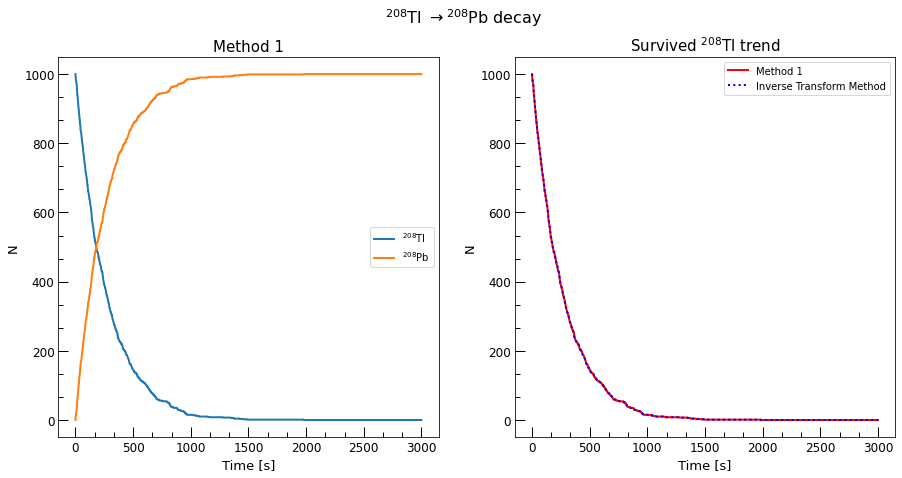

In [17]:
'''
    First exercise.
'''

tau = 3.052 * 60 # half-life
Tl = 1000 # initial values
Pb = 0
N = 3000 # number of steps in time

time = np.arange(0, N, 1) # time steps of 1 second
nTl = []
nPb = []
x = np.random.rand(Tl)

for t in time:
    
    # probability at time t
    prob = decay1(t)

    # find number of Tl at time t
    mask = x < prob
    n = Tl - len(x[mask])
    
    # append
    nTl.append(n)
    nPb.append(Tl - n)
    
'''
    Using the inverse transform method.
'''

v = decay2_cdf(x)

nTl_2 = []

for t in time:
    mask = v < t
    n = Tl - len(v[mask])
    nTl_2.append(n)

'''
    Plot results.
'''

# plot layout
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
plt.suptitle(r'${}^{208}$Tl $\rightarrow {}^{208}$Pb decay', fontsize=16)

# first plot
ax1.plot(time, nTl, lw=2, label=r'${}^{208}$Tl')
ax1.plot(time, nPb, lw=2, label=r'${}^{208}$Pb')

set_ticks(ax1, 500, 3, 200, 3)
ax1.set_xlabel("Time [s]", fontsize=13)
ax1.set_ylabel("N", fontsize=13)
ax1.set_title("Method 1", fontsize=15)
ax1.legend(loc="best", markerscale=1)

# second plot
ax2.plot(time, nTl, lw=2, color="red", label="Method 1")
ax2.plot(time, nTl_2, lw=2, color="blue", ls="dotted", label="Inverse Transform Method")

set_ticks(ax2, 500, 3, 200, 3)
ax2.set_xlabel("Time [s]", fontsize=13)
ax2.set_ylabel("N", fontsize=13)
ax2.set_title(r'Survived ${}^{208}$Tl trend', fontsize=15)
ax2.legend(loc="best", markerscale=1)

plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

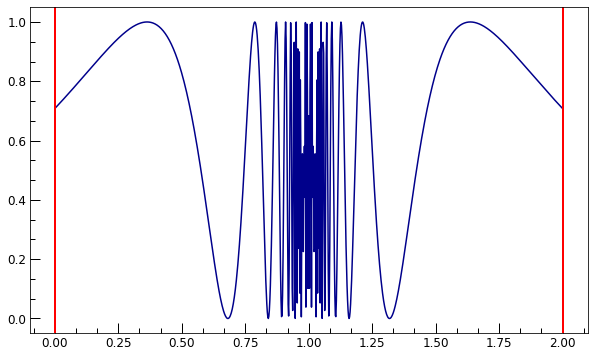

In [18]:
def f(x):
    return (np.sin(1 / (1 - x)))**2

# plot layout
fig, ax = plt.subplots(figsize=(10, 6))
set_ticks(ax, 0.25, 3, 0.2, 3)

# plot
x = np.linspace(0.001, 1.999, 1000)
ax.plot(x, f(x), color="darkblue")

# integral limits
ax.axvline(0, color="red", lw=2)
ax.axvline(2, color="red", lw=2)

plt.show()

In [19]:
'''
    Hit / Miss method.
'''
N = 100000
n = 100
int_hm = []

# compute integral n times
for j in range(n):
    counter = 0
    for i in range(N):
        x = np.random.uniform(0, 2)
        y = np.random.random()
        if y < f(x):
            counter += 1
    int_hm.append(2 * counter / N)

# compute mean and standard error
mean = np.mean(int_hm)
std = np.std(int_hm)
err_std = std / np.sqrt(n)

# results
print("The integral over", N, "points was repeated", n,
      "times and the results are:\n", int_hm)
print("Integral = %0.5f +- %0.5f" % (mean, err_std))

The integral over 100000 points was repeated 100 times and the results are:
 [1.34538, 1.34436, 1.34584, 1.34612, 1.34384, 1.34816, 1.35032, 1.3444, 1.34366, 1.34314, 1.34544, 1.34746, 1.34496, 1.34714, 1.35278, 1.34938, 1.34776, 1.3506, 1.35138, 1.34864, 1.34746, 1.34768, 1.34672, 1.3496, 1.34588, 1.34648, 1.34652, 1.34848, 1.34708, 1.34826, 1.34898, 1.34742, 1.3474, 1.3449, 1.34676, 1.35264, 1.34864, 1.34428, 1.34518, 1.34694, 1.33976, 1.3437, 1.34614, 1.3522, 1.34774, 1.34514, 1.34852, 1.351, 1.34768, 1.34846, 1.34892, 1.34822, 1.3461, 1.34454, 1.34462, 1.34816, 1.3448, 1.34868, 1.35008, 1.35244, 1.35038, 1.34926, 1.34666, 1.35064, 1.34372, 1.34666, 1.347, 1.3473, 1.34148, 1.34304, 1.34764, 1.34682, 1.34638, 1.34848, 1.34656, 1.34544, 1.34474, 1.3414, 1.34634, 1.34656, 1.34674, 1.35214, 1.34766, 1.34436, 1.34824, 1.3452, 1.34864, 1.34936, 1.34516, 1.34562, 1.35178, 1.35226, 1.34772, 1.3412, 1.3417, 1.347, 1.34842, 1.34308, 1.34662, 1.3447]
Integral = 1.34699 +- 0.00027


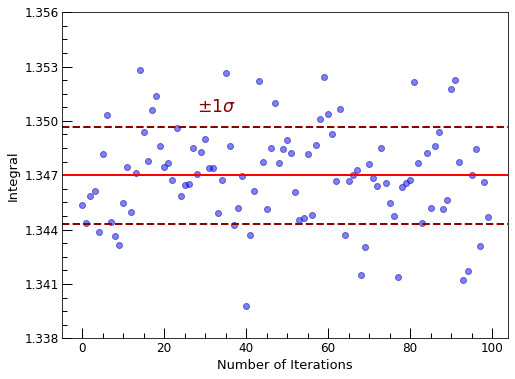

In [21]:
'''
    Informative plot about the method.
'''

# plot layout
fig, ax = plt.subplots(figsize=(8, 6))
set_ticks(ax, 20, 4, 0.003, 4)
ax.set_ylim(1.338, 1.356)

# plot
ax.scatter(range(len(int_hm)), int_hm,  marker='o',
           color='blue', edgecolor='darkblue', alpha=0.5)
ax.axhline(mean, color="red", lw=2)
ax.axhline(mean + std, color="darkred", lw=2, ls="--")
ax.axhline(mean - std, color="darkred", lw=2, ls="--")
ax.text(28, 1.3505, r'$\pm$1$\sigma$', color="darkred", size="xx-large")

# labels
ax.set_xlabel("Number of Iterations", fontsize=13)
ax.set_ylabel("Integral", fontsize=13)

plt.show()

In [22]:
'''
    Mean value method. The error of this
    method depends on the number of steps N.
    Higher the number of steps, the more accurate
    the integral estimate. On the other hand, in the 
    previous task the error was estimated as the standard
    error, which depends on the number of times n
    the integral was computed; the estimate itself always
    depends on the number of steps N though.
'''

# domain
x = np.linspace(0.001, 1.999, N)

# integral and error
int_mv = 2 * np.sum(f(x)) / N
err_mv = 2 * np.sqrt((np.sum(f(x)**2) / N - np.sum(f(x)/N)**2) / N)
print("Mean Value Method = %.5f +- %.5f" % (int_mv, err_mv))

Mean Value Method = 1.34646 +- 0.00207


In [13]:
'''
    Compatibility.
'''

comp = np.abs(mean - int_mv) / np.sqrt(err_std**2 + err_mv**2)

# compatibility hit miss - expected
#comp_ hs = np.abs(int_exp - mean) / sigmaaa
# compatibility mean value - expected
#comp_mv = np.abs(int_exp - int_mv) / sigmaaa


print("The compatibility coefficient between the two estimates is %.5f" % comp)
if comp < 3:
    print("The two estimates are compatible")

The compatibility coefficient between the two estimates is 0.25938
The two estimates are compatible


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [23]:
def f(x):                  
    sq_sum = np.sum(x**2, axis=0)      
    return np.array([1 if (s<=1) else 0 for s in sq_sum]) 

In [24]:
'''
    2D case.
'''

N = 1000000
x = np.random.uniform(-1, 1, (2, N))
int_2d = 2**2 * np.sum(f(x)) / N
err_2d = 2 * np.sqrt((np.sum(f(x)**2) / N - np.sum(f(x)/N)**2) / N)
print("2D = %.5f +- %.5f" % (int_2d, err_2d))

'''
    10D case.
'''
x = np.random.uniform(-1, 1, (10, N))
int_10d = 2**10 * np.sum(f(x)) / N
err_10d = 2 * np.sqrt((np.sum(f(x)**2) / N - np.sum(f(x)/N)**2) / N)
print("10D = %.5f +- %.5f" % (int_10d, err_10d))

2D = 3.14244 +- 0.00082
10D = 2.39821 +- 0.00010


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [25]:
def w(x):
    return 1/(np.sqrt(x))

def f(x):
    return x**-0.5/(np.exp(x)+1)

In [26]:
N = 1000000

# integral
x = np.random.rand(N)**2
int_is = 2 / N * np.sum(f(x) / w(x))
print("Integral = %.5f" % int_is)

Integral = 0.83886
